In [184]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
α=0.5
β=0.3
N0=1000000
S0=990000
I0=7000
R0=3000
t0, tf = 0, 25


In [185]:
def dsdt(t, s):
    return -α*s

In [186]:
susceptible = integrate.solve_ivp(dsdt, (t0, tf), [S0], dense_output=True)


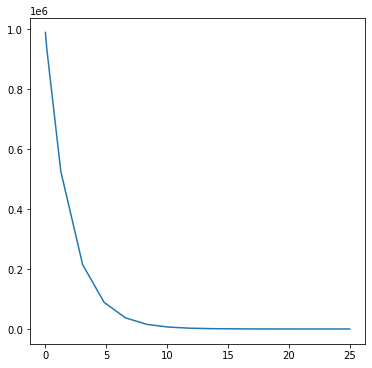

In [187]:
time = np.linspace(t0, tf, tf)
t, s = susceptible.t, susceptible.y[0]
plt.plot(t, s)
plt.show()

In [188]:
susceptible.t

array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])

In [189]:
def dsdi(t, i):
    y = α*susceptible.sol(t) - β*i
    return y
infected = integrate.solve_ivp(dsdi, (t0, tf), [I0], dense_output=True)

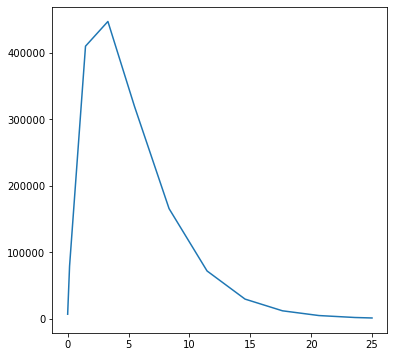

In [190]:
time = np.linspace(t0, 1000, tf)
t, s = infected.t, infected.y[0]
plt.plot(t, s)
plt.show()


In [191]:
def didt(t, i):
    y = β*i
    return y
convalescent = integrate.solve_ivp(didt, (t0, tf), [I0], dense_output=True)

In [192]:
convalescent

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 50
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000023B07F382B0>
   status: 0
  success: True
        t: array([ 0.        ,  0.12722597,  1.39948564,  4.88653871,  9.11131936,
       13.61974918, 18.24276714, 22.91297007, 25.        ])
 t_events: None
        y: array([[7.00000000e+03, 7.27233875e+03, 1.06520915e+04, 3.03225115e+04,
        1.07694800e+05, 4.16447697e+05, 1.66665001e+06, 6.76504570e+06,
        1.26528515e+07]])
 y_events: None

3000.0


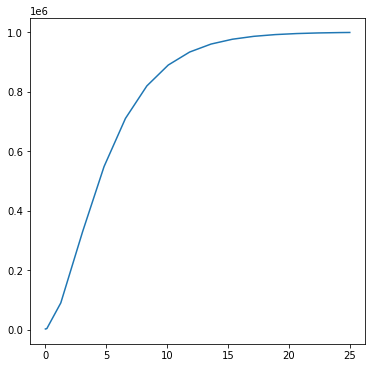

In [193]:
t = list(susceptible.t)
y = []

for num in range(len(t)):
    y.append(N0 - susceptible.sol(t[num])[0] - infected.sol(t[num])[0])

convalescent = interp1d(t, y, kind='cubic')
print(convalescent(0))
plt.plot(t, convalescent(t));

In [254]:
convalescent(t)

array([  3000.        ,   4187.36053163,  90568.09796412, 330456.05314528,
       548300.24717933, 709993.3382649 , 819122.90542491, 889252.2712394 ,
       932917.07452186, 959719.92709788, 975925.38642324, 985663.4965004 ,
       991489.94756757, 994951.3517443 , 997013.14530788, 998231.92034273,
       998628.43572803])

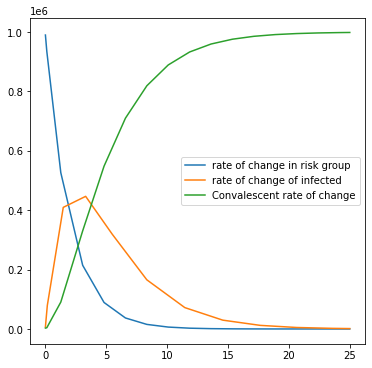

In [196]:
plt.plot(susceptible.t, susceptible.y[0], label="rate of change in risk group")
plt.plot(infected.t, infected.y[0], label="rate of change of infected")
plt.plot(t, convalescent(t), label="Convalescent rate of change")
plt.rcParams["figure.figsize"] = [6, 10]
plt.legend()

In [197]:
from scipy.optimize import leastsq
t = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([23, 17, 17, 16, 15, 14, 17, 20])

def parabola(t, a, b, c):
    return a * pow(t, 2) + b * t + c

def diff(p, y, t):
    a, b, c = p
    return y - parabola(t, a, b, c)

p0 = (1, 3, 4)
aprx, _ = leastsq(diff, p0, args=(y, t))


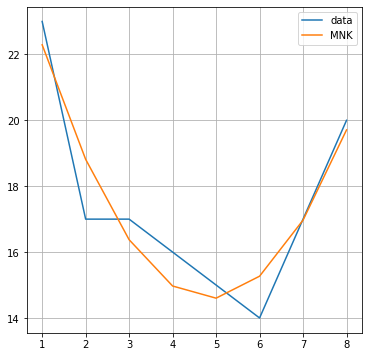

In [198]:
plt.rcParams["figure.figsize"] = [6, 6]
t = np.array([1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([23, 17, 17, 16, 15, 14, 17, 20])
y_p = aprx[0] * t ** 2 + aprx[1] * t + aprx[2]
plt.grid()
plt.plot(t, y, label='data')
plt.plot(t, y_p, label='MNK')
plt.legend()

In [199]:
import math
def st(x, a, b):
    return a * np.exp(-b * x)

def diff(p, y, x):
    a, b = p
    return y - st(x, a, b)
x, y = susceptible.t, susceptible.y[0]

In [200]:
from scipy.optimize import leastsq
sol_st, _ = leastsq(diff, (1, 2), args=(y,x))
a_st, b_st = sol_st

C:\Users\kuzik\AppData\Local\Temp\ipykernel_14720\197282293.py:3: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


In [201]:
sol_st

array([9.89978640e+05, 4.99856001e-01])

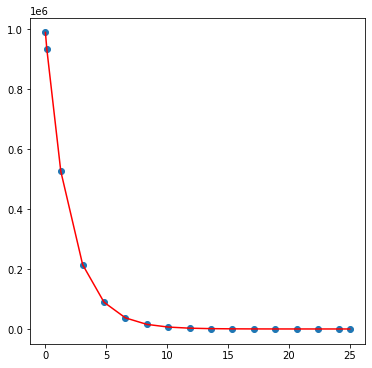

In [202]:
time = np.linspace(t0, tf, tf)
t, s = susceptible.t, susceptible.y[0]
plt.plot(t, s, 'o')
plt.plot(x, st(x, a_st, b_st), color='red')


In [313]:
def it(x, a, b, c):
    return (a + b*c*x)*np.exp(-b*x)

def diff(p, x, y):
    a, b, c = p
    return y - it(x, a, b, c)

In [314]:
y

array([9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
       8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
       2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
       7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
       3.71298656e+00])

In [315]:
xi, yi = infected.t, infected.y[0]

In [316]:
yi

array([  7000.        ,  13960.24492701,  79326.36974353, 409578.08334945,
       446699.01195032, 319077.83026358, 165571.99129925,  71966.74863389,
        29712.58392708,  12130.57394067,   5009.75291427,   2075.26330119,
         1367.85128541])

In [317]:
sol_it, _ = leastsq(diff, (1, 1, 3), args=(xi,yi))
sol_it

C:\Users\kuzik\AppData\Local\Temp\ipykernel_14720\3254161580.py:2: RuntimeWarning: overflow encountered in exp
  return (a + b*c*x)*np.exp(-b*x)


array([8.08520065e+03, 3.83762935e-01, 1.25281251e+06])

In [318]:
a_it, b_it, c_it = sol_it

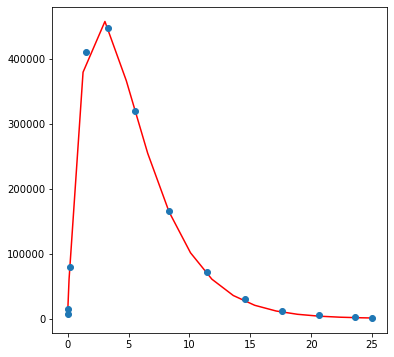

In [319]:
plt.plot(x, it(x, a_it, b_it, c_it), color='red')
plt.plot(infected.t, infected.y[0], 'o')

In [210]:
sol_st

array([9.89978640e+05, 4.99856001e-01])

In [321]:
def st(x):
    return a_st * np.exp(-b_st * x)

def it(x):
    return (a_it + b_it*c_it*x)*np.exp(-b_it*x)

In [322]:
def rt(x, n):
    return n - st(x) - it(x)
    
def diff(p, y, x):
    n = p[0]
    return y - rt(x, n)

In [323]:
xt, yt = t, convalescent(t)
p =(1,)
sol_n = leastsq(diff, p, args=(yt, xt))
sol_n

(array([998798.96916562]), 3)

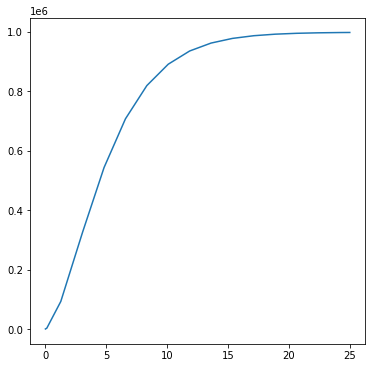

In [324]:
def rt(x):
    return sol_n[0] - st(x) - it(x)
plt.plot(xt, rt(xt))

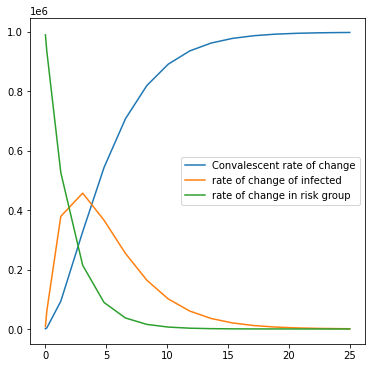

In [329]:
plt.plot(xt, rt(xt), label="Convalescent rate of change")
plt.plot(xt, it(xt), label="rate of change of infected")
plt.plot(xt, st(xt), label="rate of change in risk group")
plt.legend()

In [359]:
from scipy.optimize import minimize_scalar
min_it = minimize_scalar(lambda xt: -it(xt))

In [372]:
min_it

     fun: -463867.9634110317
    nfev: 16
     nit: 10
 success: True
       x: 2.58895862174071

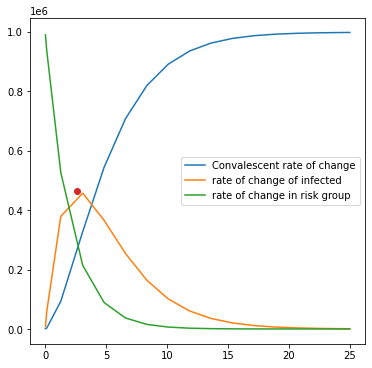

In [375]:
plt.plot(xt, rt(xt), label="Convalescent rate of change")
plt.plot(xt, it(xt), label="rate of change of infected")
plt.plot(xt, st(xt), label="rate of change in risk group")
plt.plot(min_it.x, -min_it.fun, 'o')
plt.legend()
plt.show()